In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.where(x >= 0, 1, 0)

def train_perceptron(X, y, learning_rate, epochs):
    X = np.insert(X, 0, 1, axis=1)
    np.random.seed(0)
    weights = np.random.randn(X.shape[1])
    accuracy = []

    for _ in range(epochs):
        output = step_function(np.dot(X, weights))
        error = y - output
        weights += learning_rate * np.dot(X.T, error)
        acc = np.mean(output == y)
        accuracy.append(acc)

    return weights, accuracy

def plot_accuracy(accuracy, epochs):
    plt.plot(range(1, epochs + 1), accuracy)
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.title('Acurácia versus Número de Épocas')
    plt.show()


In [ ]:
iris_data = pd.read_csv('Iris.csv')
filtered_data = iris_data[iris_data['Species'].isin(['Iris-setosa', 'Iris-versicolor'])]
filtered_data['Species'] = np.where(filtered_data['Species'] == 'Iris-setosa', 1, 0)
selected_data = filtered_data[['PetalLengthCm', 'PetalWidthCm']]

X = selected_data.values
y = filtered_data['Species'].values
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


<ipython-input-32-a7a5b63ba573>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Species'] = np.where(filtered_data['Species'] == 'Iris-setosa', 1, 0)


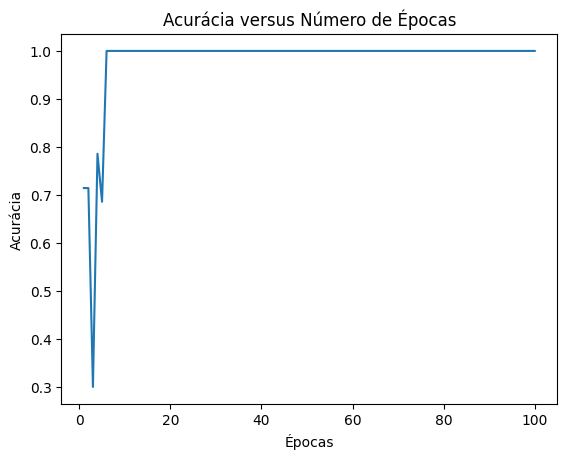

In [ ]:
learning_rate = 0.01
epochs = 100

weights, accuracy = train_perceptron(X_train, y_train, learning_rate, epochs)
plot_accuracy(accuracy, epochs)


In [ ]:
print("Acurácia obtida:", accuracy[-1])


Acurácia obtida: 1.0


//


<ipython-input-35-77b8e6546faf>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Species'] = np.where(filtered_data['Species'] == 'Iris-virginica', 1, 0)


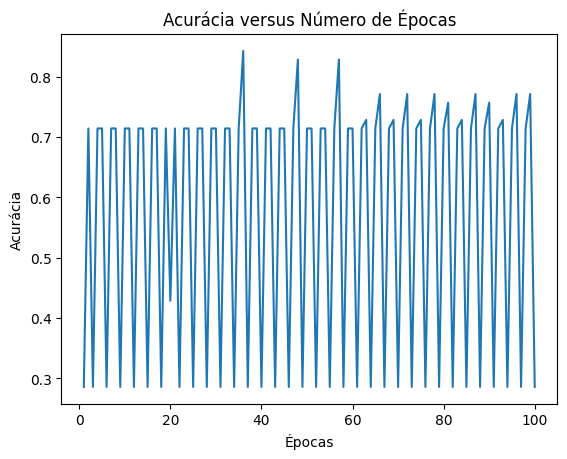

Acurácia obtida: 0.2857142857142857


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.where(x >= 0, 1, 0)

def train_perceptron(X, y, learning_rate, epochs):
    X = np.insert(X, 0, 1, axis=1)
    np.random.seed(0)
    weights = np.random.randn(X.shape[1])
    accuracy = []

    for _ in range(epochs):
        output = step_function(np.dot(X, weights))
        error = y - output
        weights += learning_rate * np.dot(X.T, error)
        acc = np.mean(output == y)
        accuracy.append(acc)

    return weights, accuracy

def plot_accuracy(accuracy, epochs):
    plt.plot(range(1, epochs + 1), accuracy)
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.title('Acurácia versus Número de Épocas')
    plt.show()

iris_data = pd.read_csv('Iris.csv')
filtered_data = iris_data[iris_data['Species'].isin(['Iris-virginica', 'Iris-versicolor'])]
filtered_data['Species'] = np.where(filtered_data['Species'] == 'Iris-virginica', 1, 0)
selected_data = filtered_data[['PetalWidthCm', 'PetalLengthCm']]

X = selected_data.values
y = filtered_data['Species'].values
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

learning_rate = 0.01
epochs = 100

weights, accuracy = train_perceptron(X_train, y_train, learning_rate, epochs)
plot_accuracy(accuracy, epochs)

print("Acurácia obtida:", accuracy[-1])


//

In [ ]:
!pip install tensorflow


In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Carregar os dados
iris_data = pd.read_csv('Iris.csv')

# Converter as espécies em valores numéricos
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_data['Species'] = iris_data['Species'].map(species_mapping)

# Separar as características e os rótulos
X = iris_data.iloc[:, 1:5].values
y = iris_data['Species'].values

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalizar as características
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

# Definir a arquitetura da rede neural
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Avaliar o modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)

print("Acurácia obtida:", accuracy)


1/1 [==============================] - 0s 32ms/step - loss: 17.2300 - accuracy: 0.2000
Acurácia obtida: 0.20000000298023224
